In [1]:
!pip install scikit-learn
!pip install sklearn-compiledtrees

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 
  Created wheel for sklearn-compiledtrees: filename=sklearn_compiledtrees-1.2-cp37-cp37m-linux_x86_64.whl size=61445 sha256=0a18284b3264c24bbd0ef32a98f6323867d53dcdf83e9d6032423ef0c26ceacb
  Stored in directory: /root/.cache/pip/wheels/41/e0/25/d6a069a0d4b1084203210020943abee842e1a1aceddc451ee1
Successfully built sklearn-compiledtrees


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
car_data = pd.read_csv("CarPrice.csv", sep=",")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_data.tail()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# car_data.loc[:,'CarName', "horsepower", "highwaympg"]

In [7]:
car_data.shape

(205, 26)

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
car_data.describe()
# car_data.drop_duplicates(inplace= True)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [11]:
car_data.isnull().sum()/ car_data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [12]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

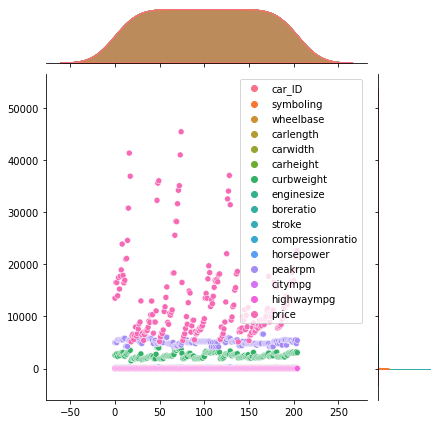

In [13]:

sns.jointplot(data=car_data)
plt.show()


In [14]:
car_data = car_data[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]


car_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


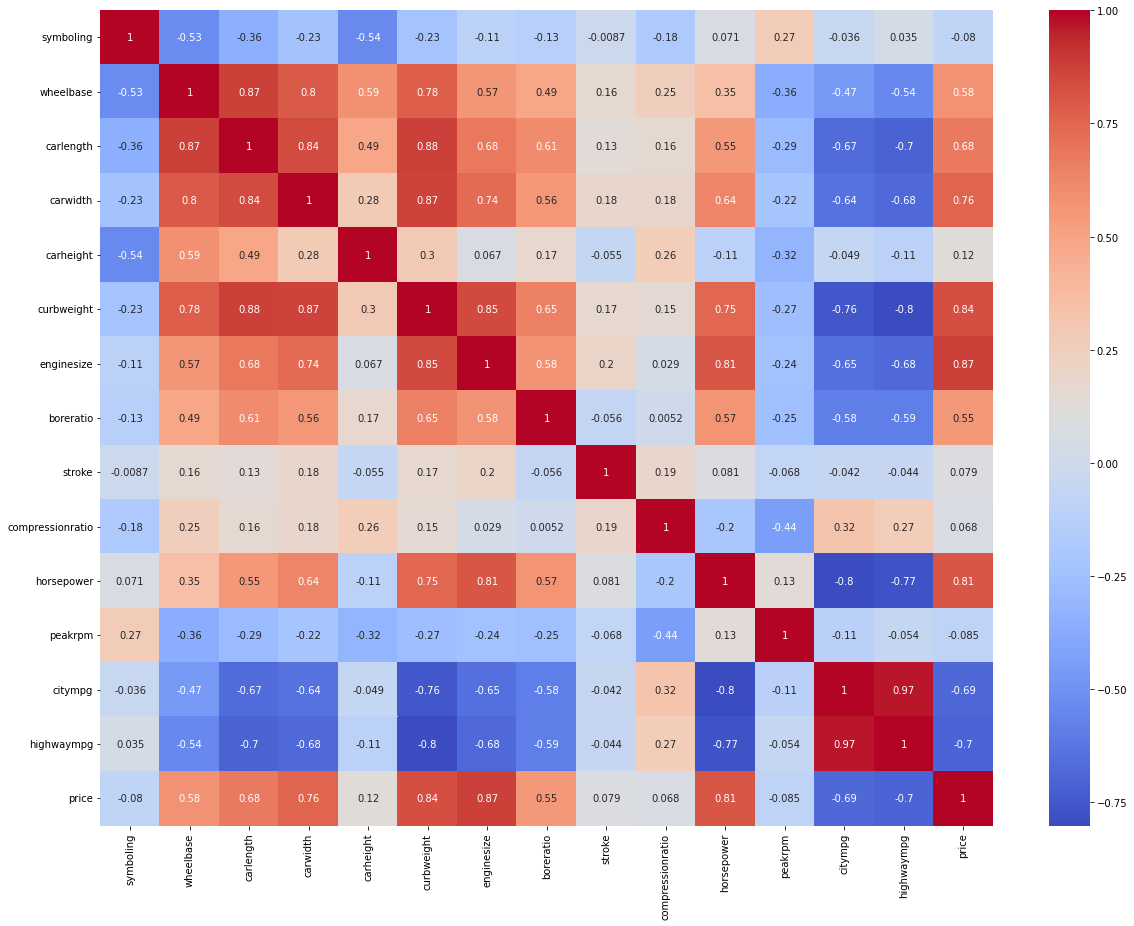

In [15]:
plt.figure(figsize=(20, 15))
correlations = car_data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [16]:
predict = "price"
x = car_data.drop([predict], 1)
y = car_data[predict]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [17]:
xtrain

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
11,0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29
120,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,9.4,68,5500,31,38
138,2,93.7,156.9,63.4,53.7,2050,97,3.62,2.36,9.0,69,4900,31,36
36,0,96.5,157.1,63.9,58.3,2024,92,2.92,3.41,9.2,76,6000,30,34
134,3,99.1,186.6,66.5,56.1,2707,121,2.54,2.07,9.3,110,5250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,98.4,176.2,65.6,52.0,2536,146,3.62,3.50,9.3,116,4800,24,30
194,-2,104.3,188.8,67.2,56.2,2912,141,3.78,3.15,9.5,114,5400,23,28
103,0,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.0,152,5200,19,25
65,0,104.9,175.0,66.1,54.4,2670,140,3.76,3.16,8.0,120,5000,19,27


In [18]:
xtest

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
147,0,97.0,173.5,65.4,53.0,2455,108,3.62,2.640,9.0,94,5200,25,31
144,0,97.0,172.0,65.4,54.3,2385,108,3.62,2.640,9.0,82,4800,24,25
137,2,99.1,186.6,66.5,56.1,2847,121,3.54,3.070,9.0,160,5500,19,26
175,-1,102.4,175.6,66.5,53.9,2414,122,3.31,3.540,8.7,92,4200,27,32
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.150,8.7,160,5300,19,25
170,2,98.4,176.2,65.6,52.0,2679,146,3.62,3.500,9.3,116,4800,24,30
107,0,107.9,186.7,68.4,56.7,3020,120,3.46,3.190,8.4,97,5000,19,24
96,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.290,9.4,69,5200,31,37
34,1,93.7,150.0,64.0,52.6,1956,92,2.91,3.410,9.2,76,6000,30,34
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.0,111,5000,21,27


In [19]:
ytrain

11     16925.0
120     6229.0
138     5118.0
36      7295.0
134    15040.0
        ...   
168     9639.0
194    12940.0
103    13499.0
65     18280.0
50      5195.0
Name: price, Length: 164, dtype: float64

In [20]:
ytest

147    10198.0
144     9233.0
137    18620.0
175     9988.0
201    19045.0
170    11199.0
107    11900.0
96      7499.0
34      7129.0
1      16500.0
99      8949.0
48     35550.0
105    19699.0
22      6377.0
200    16845.0
56     11845.0
115    16630.0
12     20970.0
106    18399.0
44      8916.5
190     9980.0
40     10295.0
57     13645.0
93      7349.0
150     5348.0
17     36880.0
77      6189.0
100     9549.0
29     12964.0
68     28248.0
126    32528.0
158     7898.0
13     21105.0
128    37028.0
117    18150.0
151     6338.0
160     7738.0
53      6695.0
176    10898.0
199    18950.0
74     45400.0
Name: price, dtype: float64

In [22]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)
print(f"Estimated result: {model.score(xtest, predictions)}")

Estimated result: 1.0
